#Titanic - Predicting Survival Machine Learning

This project was built after completing the *Introduction to Machine Learning with Sklearn* course presented by [WeCloudData](https://weclouddata.com). In this course the instructor walked us through the creation of a simple decision tree model to predict passenger survial on the Titanic. This project is my adaptation and (slight!) refinement of that model.

##Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

##Read Data

In [ ]:
titanic = pd.read_csv('https://weclouddata.s3.amazonaws.com/data/titanic.csv')

##Review Data

### View Info

Row number, column names, non-null count, data type.

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308 entries, 0 to 1307
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1308 non-null   int64  
 1   survived   1308 non-null   int64  
 2   name       1308 non-null   object 
 3   sex        1308 non-null   object 
 4   age        1045 non-null   float64
 5   sibsp      1308 non-null   int64  
 6   parch      1308 non-null   int64  
 7   ticket     1308 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1306 non-null   object 
 11  boat       486 non-null    object 
 12  body       120 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


###View First Five Rows

In [ ]:
titanic.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


###View Dimensions & Indexing

In [ ]:
titanic.shape

(1308, 14)

In [ ]:
titanic.index

RangeIndex(start=0, stop=1308, step=1)

###View Column Names

In [ ]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

### View Statistical Summary

Statistical summary of numeric variables.

In [ ]:
titanic.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1308.000000,1308.000000,1045.000000,1308.000000,1308.000000,1308.000000,120.000000
mean,2.294343,0.382263,29.851834,0.499235,0.385321,33.295479,159.975000
std,0.837929,0.486126,14.389201,1.041965,0.865826,51.758668,97.672103
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,71.500000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,154.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,255.250000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


###Count Missing Values

In [ ]:
titanic.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            0
cabin        1013
embarked        2
boat          822
body         1188
home.dest     563
dtype: int64

##Calculate & View Mean Age

In [ ]:
mean_age = titanic['age'].mean()
mean_age

29.851834162679427

##Fill Missisng Age Values
As shown above, 263 age values are missing from the dataset. Null values can be filled with the mean age calculated above.

In [ ]:
titanic['age'] = titanic['age'].fillna(mean_age)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1304,3,0,"Zabour, Miss. Thamine",female,29.851834,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1305,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1306,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


##Count Survivors by Sex

In [ ]:
titanic.groupby('sex')['survived'].sum()

sex
female    339
male      161
Name: survived, dtype: int64

##Count of Passengers by Sex

In [ ]:
titanic['sex'].value_counts()

male      842
female    466
Name: sex, dtype: int64

##Save New Dataframe

In [ ]:
titanic.to_csv('new_titanic.csv')


##Data Visualization

###Male vs. Female Passengers 

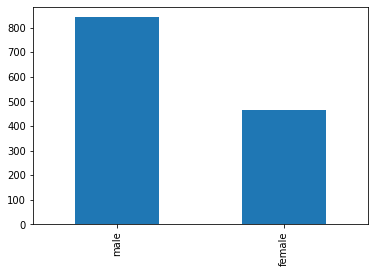

In [ ]:
titanic['sex'].value_counts().plot(kind = 'bar');

###Age Distribution of Passengers

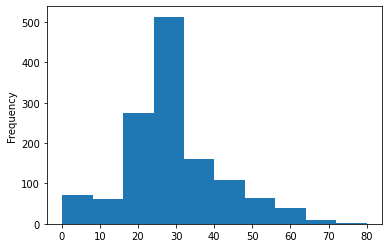

In [ ]:
titanic['age'].plot(kind = 'hist');

###Died v. Survived 

0 = died, 1 = survived.

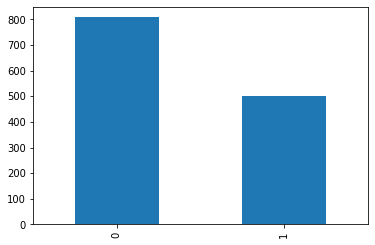

In [ ]:
titanic['survived'].value_counts().plot(kind = 'bar');

##Machine Learning

Simple decision tree model.

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from mlxtend.plotting import category_scatter
from mlxtend.plotting import plot_decision_regions

In [ ]:
X, y = make_blobs(centers=[[1, 1], [2, 2]], random_state=1)
df = pd.DataFrame(X, columns=['feature1', 'feature2']).assign(label=y)
df.head()                

,feature1,feature2,label
0,0.471828,-0.072969,0
1,1.889553,1.382638,1
2,2.520576,0.855659,1
3,1.819080,1.396079,1
4,4.190700,0.103639,1


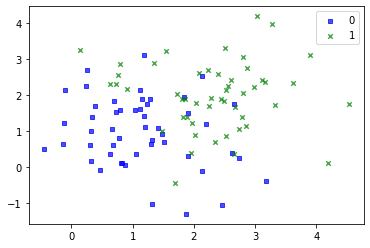

In [ ]:
category_scatter(x='feature1', y='feature2', label_col='label', data=df);

max_depth value controls the level of fit. Overfitting occured at max_depth >= 3 and a max_depth = 1 underfits.

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


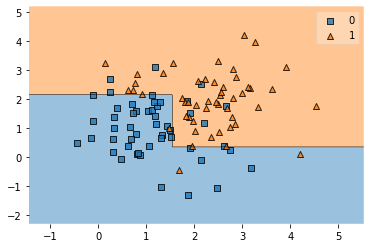

In [ ]:
d_tree = DecisionTreeClassifier(max_depth=2)
d_tree.fit(X, y)
plot_decision_regions(X, y, clf=d_tree);

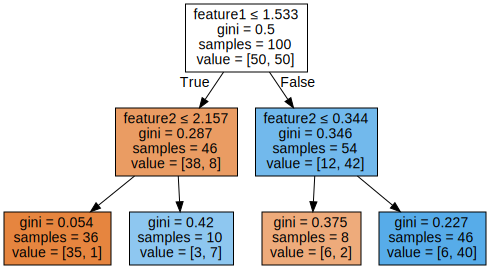

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(d_tree, out_file=None, feature_names=['feature1', 'feature2'],  
                                filled=True, special_characters=True)  

graphviz.Source(dot_data)

###One Hot Encoding

Creates a column ('male') that expresses passenger sex numerically (female = 0, male = 1) so it can be fed into the ML model.

In [ ]:
new_sex = pd.get_dummies(titanic['sex'], drop_first=True)
titanic = pd.concat([titanic, new_sex], axis=1)
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,male
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",0
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303,3,0,"Zabour, Miss. Hileni",female,14.500000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,0
1304,3,0,"Zabour, Miss. Thamine",female,29.851834,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,0
1305,3,0,"Zakarian, Mr. Mapriededer",male,26.500000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1
1306,3,0,"Zakarian, Mr. Ortin",male,27.000000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1


###Select Features & Create Features Dataset

During testing I also added 'embarked' as a fature but it made the model preform worse than expected.

In [ ]:
X = titanic[['pclass', 'age', 'sibsp', 'parch', 'fare', 'male']]
X

,pclass,age,sibsp,parch,fare,male
0,1,29.000000,0,0,211.3375,0
1,1,0.916700,1,2,151.5500,1
2,1,2.000000,1,2,151.5500,0
3,1,30.000000,1,2,151.5500,1
4,1,25.000000,1,2,151.5500,0
...,...,...,...,...,...,...
1303,3,14.500000,1,0,14.4542,0
1304,3,29.851834,1,0,14.4542,0
1305,3,26.500000,0,0,7.2250,1
1306,3,27.000000,0,0,7.2250,1


###Make Label

In [ ]:
y = titanic['survived']

###Make Validation Dataset

2/3rds of dataset is used to train the model and 1/3rd is used for testing.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

###Build & Train *Model*

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

###Model Predictions

In [ ]:
y_predict = model.predict(X_test)

###Model Evaluation

My model correctly predicted survival 76.2% of the time (approximately 996 passengers out a total of 1308). 

In [ ]:
accuracy_score(y_test, y_predict)

0.7615740740740741

##Summary

This was my first attempt at creating an ML model and my first time coding in Python so I'm pretty happy with a 76.2% accuracy rate. 

I was suprised to see that the additon of 'embarked' actually made the model preform worse. In the future results may be improved by adding the feature 'cabin' to the model. Cabin numbers are noted in a letter plus number format (for example: B5). Extracting the letter, which refers to the deck level, could provide valuable insight. 

In the future it would also be worth exploring more sophisticated ML models.
